In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('bread basket.csv')
print("DataFrame shape : ", data.shape) 
data.head()

DataFrame shape :  (20507, 5)


,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


In [5]:
# fomrat data waktu
data['date_time'] = pd.to_datetime(data['date_time'], format='%d-%m-%Y %H:%M')

In [6]:
data["date_time"].dtype

dtype('<M8[ns]')

In [7]:
data["month"] = data["date_time"].dt.month
data["day"] = data["date_time"].dt.weekday
data["hour"] = data["date_time"].dt.hour
data.head() 


,Transaction,Item,date_time,period_day,weekday_weekend,month,day,hour
0,1,Bread,2016-10-30 09:58:00,morning,weekend,10,6,9
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,10,6,10
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,10,6,10
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend,10,6,10
4,3,Jam,2016-10-30 10:07:00,morning,weekend,10,6,10


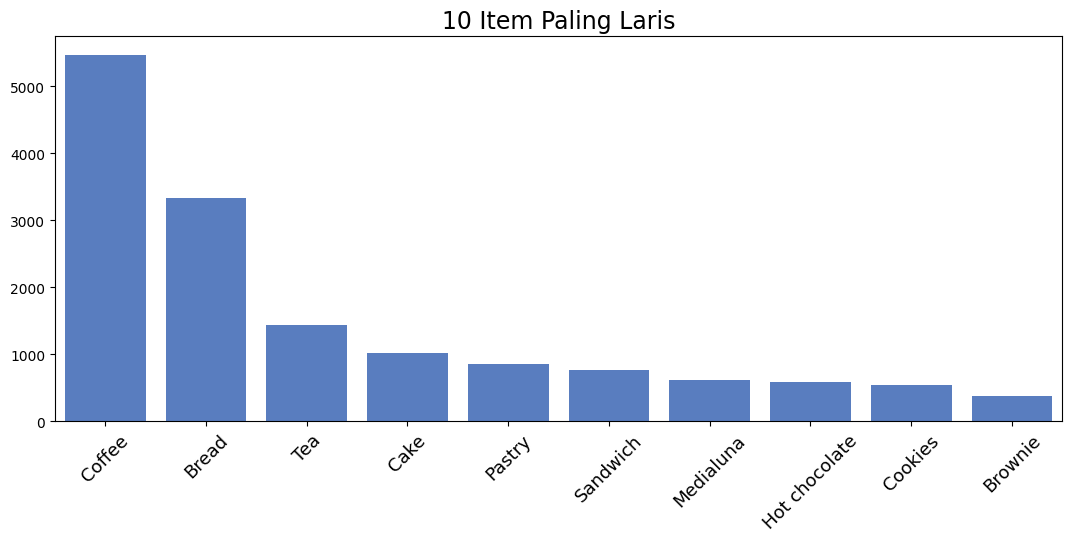

In [8]:
# menampilkan 10 item paling laris

plt.figure(figsize=(13,5))
sns.set_palette("muted")

sns.barplot(x = data["Item"].value_counts()[:10].index,
            y = data["Item"].value_counts()[:10].values)
            
plt.xlabel(""); plt.ylabel("")
plt.xticks(size = 13, rotation = 45)
plt.title("10 Item Paling Laris", size = 17)
plt.show()

Text(0.5, 1.0, 'Jumlah Transaksi per Bulan')

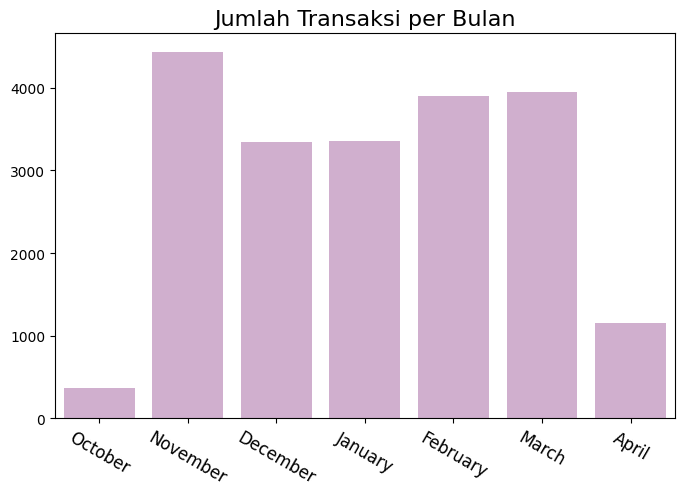

In [9]:
# Transaksi tiap bulan

data_perbulan = data.groupby("month")["Transaction"].count()
data_perbulan = pd.concat([data_perbulan.iloc[4:], data_perbulan.iloc[:4]])

plt.figure(figsize=(8,5))
sns.barplot(
    x = ["October", "November", "December", "January", "February", "March", "April"],
    y = data_perbulan.values, color="#D5AAD3"
)

plt.xticks(size=12, rotation= -30)
plt.title("Jumlah Transaksi per Bulan", size=16)

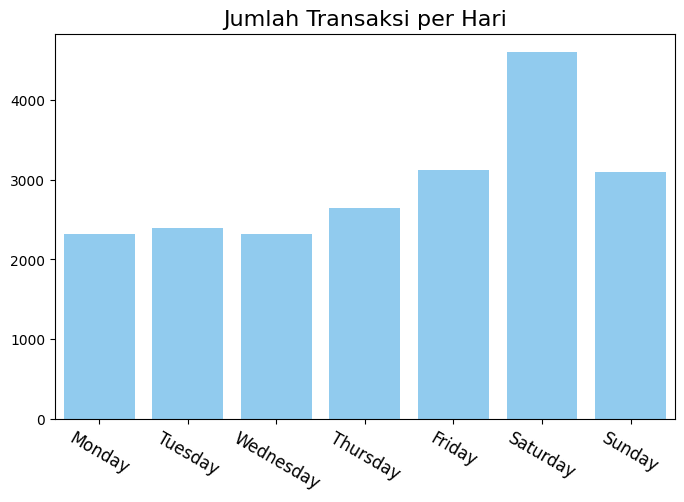

In [10]:
data_perday = data.groupby("day")["Transaction"].count()

plt.figure(figsize=(8,5))
sns.barplot(
    x = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],
    y = data_perday.values, color="#82CFFD"
)
plt.xticks(size=12, rotation= -30)
plt.title("Jumlah Transaksi per Hari", size=16)
plt.show()

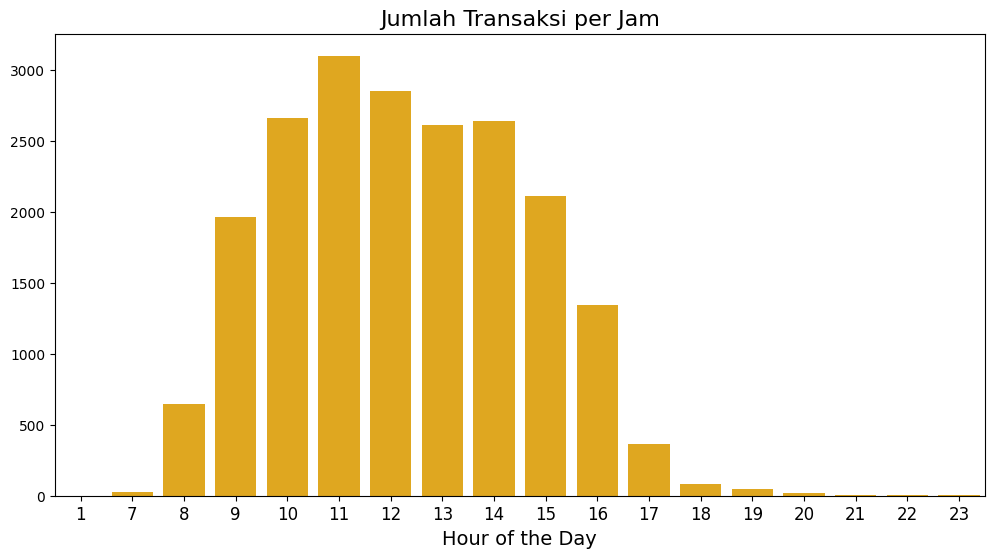

In [11]:
# pembelian per jam

data_perhour = data.groupby("hour")["Transaction"].count()

plt.figure(figsize=(12,6))
sns.barplot(
    x = data_perhour.index,
    y = data_perhour.values, color="#ffb400"
)
plt.xlabel("Hour of the Day", size=14)
plt.title("Jumlah Transaksi per Jam", size=16)
plt.xticks(size=12)
plt.show()

In [12]:
## data preparation

In [20]:
data["Item"] = data["Item"].apply(lambda item: item.lower())

In [21]:
data["Item"] = data["Item"].apply(lambda item: item.strip())

In [13]:
data = data[['Transaction', 'Item']].copy()
data.head(10)

,Transaction,Item
0,1,Bread
1,2,Scandinavian
2,2,Scandinavian
3,3,Hot chocolate
4,3,Jam
5,3,Cookies
6,4,Muffin
7,5,Coffee
8,5,Pastry
9,5,Bread


In [26]:
from mlxtend.frequent_patterns import apriori, association_rules


In [15]:
item_count = data.groupby(['Transaction', 'Item'])['Item'].count().reset_index(name='Count')
item_count.head(10)

,Transaction,Item,Count
0,1,Bread,1
1,2,Scandinavian,2
2,3,Cookies,1
3,3,Hot chocolate,1
4,3,Jam,1
5,4,Muffin,1
6,5,Bread,1
7,5,Coffee,1
8,5,Pastry,1
9,6,Medialuna,1


In [16]:
item_count_pivot = item_count.pivot_table(index='Transaction', columns='Item', values='Count', aggfunc='sum').fillna(0)
print("Ukuran dataset :",item_count_pivot.shape)
item_count_pivot.head(10)

Ukuran dataset : (9465, 94)


Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
item_count_pivot = item_count_pivot.astype("int32")
item_count_pivot.head()

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
def encode(x):
    if x <= 0:
        return 0
    elif x >= 1:
        return 1
    
item_count_pivot = item_count_pivot.applymap(encode)
item_count_pivot.head()

C:\Users\zakie\AppData\Local\Temp\ipykernel_9332\922225679.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  item_count_pivot = item_count_pivot.applymap(encode)


Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
print("Ukuran dataset :", item_count_pivot.shape)
print("Jumlah transaksi :", item_count_pivot.shape[0])
print("Jumlah item :", item_count_pivot.shape[1])

Ukuran dataset : (9465, 94)
Jumlah transaksi : 9465
Jumlah item : 94


In [20]:
support = 0.01
frequent_items = apriori(item_count_pivot, min_support=support, use_colnames=True)
frequent_items.sort_values('support', ascending=False).head(10)

c:\Users\zakie\OneDrive - Universitas Islam Indonesia\analisis-basket\.venv\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
6,0.478394,(Coffee)
2,0.327205,(Bread)
26,0.142631,(Tea)
4,0.103856,(Cake)
34,0.090016,"(Bread, Coffee)"
19,0.086107,(Pastry)
21,0.071844,(Sandwich)
16,0.061807,(Medialuna)
12,0.058320,(Hot chocolate)
42,0.054728,"(Cake, Coffee)"


In [27]:
metric = "lift"
min_threshold = 1.0

rules = association_rules(frequent_items, metric=metric, min_threshold=min_threshold)[["antecedents", "consequents", "support", "confidence", "lift"]]
rules.sort_values("confidence", ascending=False,inplace=True)
rules.head(15)

,antecedents,consequents,support,confidence,lift
30,(Toast),(Coffee),0.023666,0.704403,1.472431
28,(Spanish Brunch),(Coffee),0.010882,0.598837,1.251766
18,(Medialuna),(Coffee),0.035182,0.569231,1.189878
22,(Pastry),(Coffee),0.047544,0.552147,1.154168
0,(Alfajores),(Coffee),0.019651,0.540698,1.130235
17,(Juice),(Coffee),0.020602,0.534247,1.116750
24,(Sandwich),(Coffee),0.038246,0.532353,1.112792
6,(Cake),(Coffee),0.054728,0.526958,1.101515
26,(Scone),(Coffee),0.018067,0.522936,1.093107
12,(Cookies),(Coffee),0.028209,0.518447,1.083723
